# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**2207ACDS_teamnd6**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

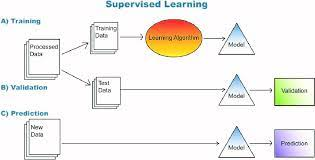

This challenge focuses on Supervised Learning(see image above): We used various Regression Models to extrapolate the prediction of Spain's three hourly load shortfalls. For ths project, we followed the Data Science Process which includes data collection, exploratory data analysis, cleaning, model building and model deployment. 

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



For this study, we will analyse the Spain Electricity Shortfall dataset. The methodology for this project includes and not limited to exploratory data anlyses and model prediction. To perform these various tasks, the following libraries were loaded:

+ For data manipulation and analysis, Pandas and Numpy.
+ For data visualization, Matplotlib and Seaborn.
+ For data preparation, model building and evaluation, Scipy and Sklearn.


**The importation of these libraries can be seen below:**

In [1]:
# Libraries for data loading, manipulation and analysis
import numpy as np
import pandas as pd

# Libraries for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.graphics.correlation import plot_corr
import statsmodels.api as smapi

# Libraries for Data Preparation
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
# import scaler method from sklearn
from sklearn.preprocessing import StandardScaler


# Libraries for Model Building
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# Libraries for Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

# Libraries for Saving Model
import pickle


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


The data used for this project was located in the `df_train.csv` file. To better manipulate and analyse the `df_train.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `df`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.


In [2]:
# Loading of the data
df = pd.read_csv("df_train.csv", index_col=False)

To set the maximum number of columns to be displayed, the `pd.set_option()` function was put in place.

In [3]:
# displays unlimited number of columns
pd.set_option("display.max_columns", None)

To prevent any major unnecessary changes occurring to the original data, a copy of the dataframe was made using the `df.copy()` method and referred to as `df_copy`.

In [4]:
# The copy of the dataframe
df_copy = df.copy()

<a id="two"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. 
 

### 3.1 Displaying the Data

The function `.head()` was used to view the first few rows of the dataset.

In [6]:
# Outputs the first 5 rows of the dataset
df_copy.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


***


+ **Results** : An `Unnamed:0` column that serve as index is shown first in the dataset. This `Unnamed:0` column will eventually be dropped from the dataframe during the data preprocessing phase as an index column is already present. The dataframe highlights various weather features of cities in Spain i.e. Barcelona, Madrid, Valencia, Bilbao, Seville and Madrid. The load_shortfall_3h is the target variable and is shown in the last column.  Most of the columns consists solely of numeric values except Valenica wind degrees (level status) and Seville pressure (sp: Static pressure) which are categorical. During the data preprocessing phase, categorical values will be encoded to represent numerical values. 

***

### 3.2 Data Anaylses

`.shape` function returned the number of rows by the number of columns in the dataset.

In [7]:
# Displays the number of rows and columns
df_copy.shape

(8763, 49)

***


+ **Results** : The dataset consists of 8763 rows (observations) and 49 columns (features). Of the 49 features, 1 is a response/target variable.



***

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [8]:
# Displays information of the Dataframe
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

***


+ **Results** : The `.info` method showcases the 48 columns and 8763 rows contained within the dataframe. All the features have *non-null* attributes which defines the enforcement of a column to not accept any NULL values. The time, `Valencia_wind_deg` and `Seville_pressure` columns are of type *'object'* which will be converted to a numeric dtypes via Dummy variable encoding during the preprocessing phase. The `Unnamed:0` column is a numeric *int64* dtype whereas the 45 other features are of *float64* numeric dtype.
 
 
***

### 3.3 Missing Values

Determining the missing values in the dataset is vital in accurately investigating the relationship between the variables. If not handled correctly it could cause: 
+ Reduction in the power/fit of the model.
+ Have it become a biased model. 

In [9]:
# Outputs the number of missing values
values = pd.DataFrame(df_copy.isnull().sum(), columns=['nulls'])

# Displays the percentage of missing values within the dataset
values["%_of_nulls"]=round(df_copy.isnull().sum()/len(df_copy)*100)
values

,nulls,%_of_nulls
Unnamed: 0,0,0.0
time,0,0.0
Madrid_wind_speed,0,0.0
Valencia_wind_deg,0,0.0
Bilbao_rain_1h,0,0.0
Valencia_wind_speed,0,0.0
Seville_humidity,0,0.0
Madrid_humidity,0,0.0
Bilbao_clouds_all,0,0.0
Bilbao_wind_speed,0,0.0


***


+ **Results** : The above code highlights that the `Valencia pressure` column is the only column with missing value as its 2068 rows consists of missing values. It can further be said that the column has 24% missing values. The missing values will be dealt with during the data preprocessing phase.

***

### 3.4 Descriptive Statistics

Statistical analyses in EDA is crucial for analysing the features within the dataframe. The method, `.describe()` outputs the **Five-number summary**. This descriptive statistics summaries  the count, mean, standard deviation, min, quartile ranges and max for the numeric variables in our dataframe.

In [10]:
# Displays the summary statistics
df_copy_transposed = df_copy.describe().T

df_copy_transposed

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


***


+ **Results** : The descriptive statistics table above highlights the various cities and their weather categories i.e. temperature, rain, wind, snow etc. The cities are shown to have similar values in regards to their weather categories e.g. minimum rain in Seville and Barcelona etc. A zero value within a row, specify that the particular weather category did not occur for that city.


***

### 3.5  Kurtosis and Skewness

To give additional information about the distribution of our dataset, we had a look at the Skewness (`.skew()`)
and the kurtosis (`.kurtosis()`) functions respectively. Skewness is defined by ita measure of its asymmetry in a probability distribution whereas kurtosis describes the lack or heaviness of the tail (outliers) when compared to normal distribution.

In [11]:
# Skewness of the dataframe
df_copy.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

***


+ **Results** : Features that are fairly symmetrical such as the target variable, load_shortfall_3h falls within the range -0.5 < x < 0.5. 

***

In [12]:
# Kurtosis of the dataframe
df_copy.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

***


+ **Results** : 13 of the 48 features (27%) have a kurtosis of > 3 which means these features have a lot of outliers. The rest of the features have less outlier as is described as low kurtosis.

***

### 3.6 Data Visualization of relevant feature interactions

The following plots displays the various relationships between the various features.

#### 3.6.1 The Numerical Feature Distributions

To investigate the distribution of the various numerical features, `.hist()` method was demonstrated.

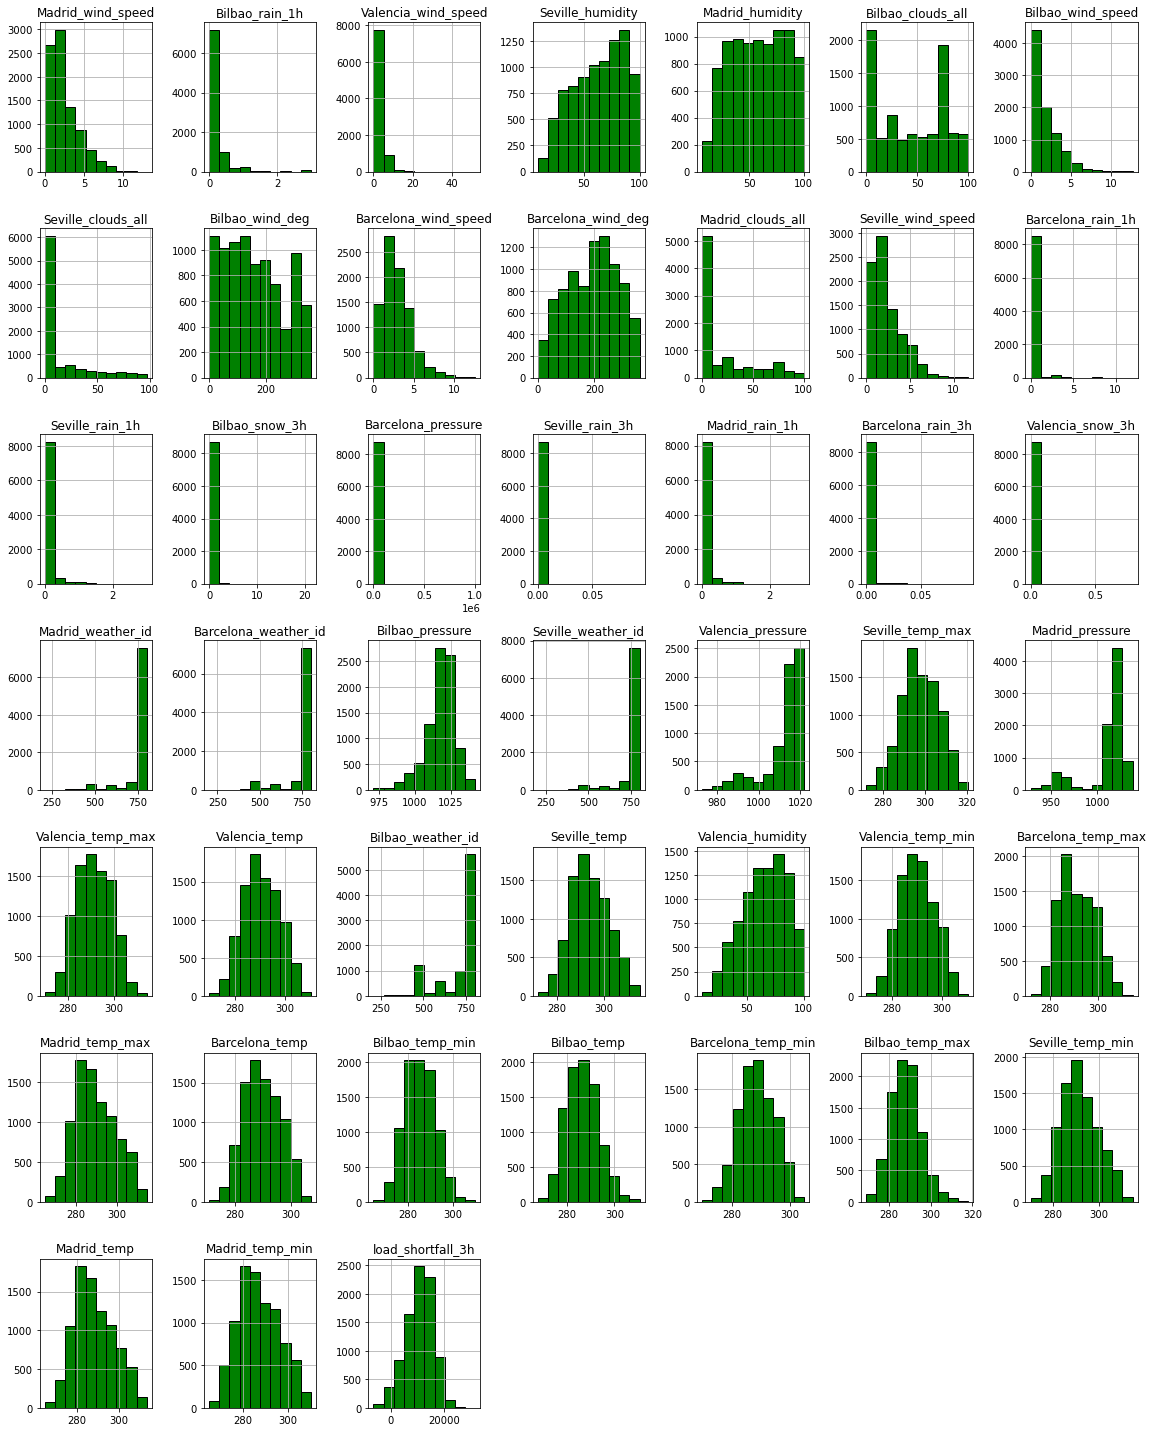

In [13]:
# Displaying the columns with numerical values
y_col = df_copy.select_dtypes(include="float64").columns

# Adjust padding between/around subplots and set figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Creating the plot
axs = df_copy[y_col].hist(figsize=(16, 20),color='green', ec='k')

# Showing the plot
plt.show()

***


+ **Results** : As seen above, the load shortfall is shown to have a fairly symmetrical distribution, which has also been highlighted in `.skew()` method. There are few features such as rain that our heavily skewed as they consist of zero values and has also been demonstrated in the summary statistics (`.describe` method).


***

We decided to have a closer look at the distribution of the target variable, `load_shortfall_3h` by creating a density plot using the function `sns.displot`.

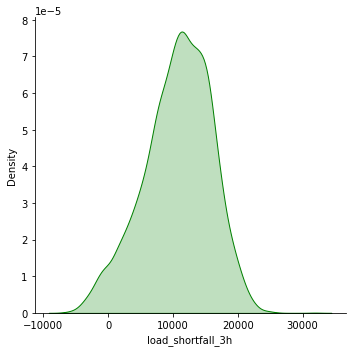

In [14]:
#sns.load_dataset("penguins")
sns.displot(df_copy,x='load_shortfall_3h',kind="kde",fill=True,color="green")

The density plot above characterises the depiction of the target variable, `load_shortfall_3h` to be close to a normal distribution.

#### 3.6.2 The Categorical Feature Distributions

The load shortfall's relationship with the categorical features i.e. `Seville pressure` and `Valencia wind degree` was analysed using `sns.catplot`.

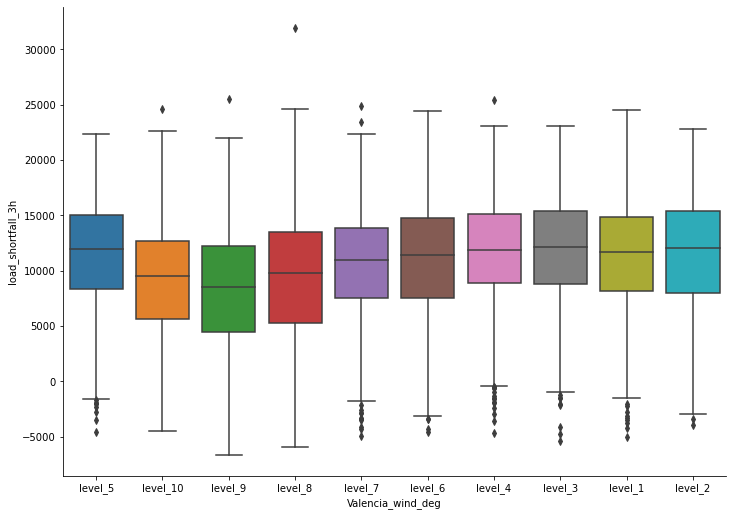

In [15]:
# Displays the relationship between the load shortfall and Valencia wind degrees

sns.catplot(data=df_copy,x="Valencia_wind_deg", y="load_shortfall_3h", kind="box",
            height=7.27, aspect=11.7/8.27)


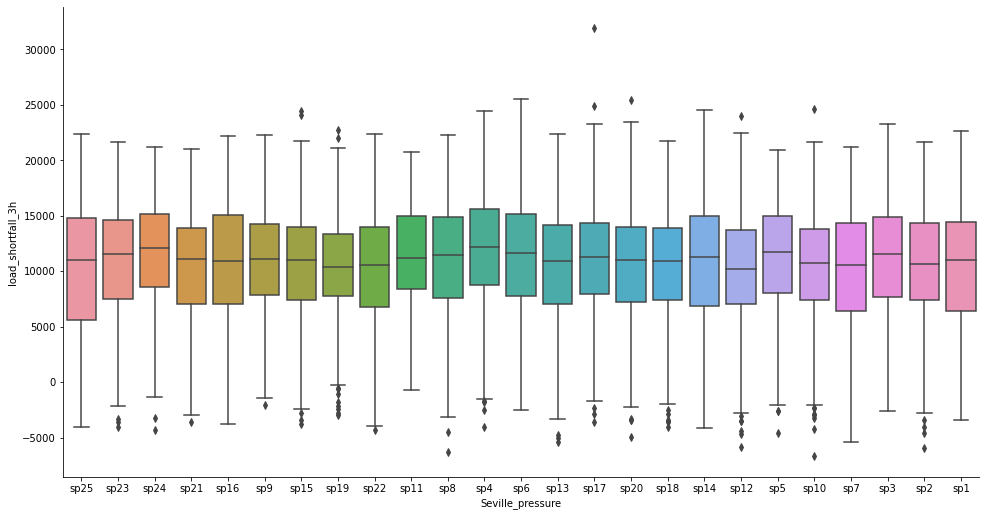

In [16]:
# Displays the relationship between the load shortfall and Seville Pressure

sns.catplot(data=df_copy,x="Seville_pressure", y="load_shortfall_3h", kind="box",
            height=7.27, aspect=15.7/8.27)

***


+ **Results** : The above plots shows a quite a few outliers for both `Seville Pressure` and `Valencia wind degree` features .


***

#### 3.6.3 The graphical representation of the load_shortfall_3h over time. 

Before plotting the categorisation of the load shortfall dataset's time frame, the `time` feature was converted to a numerical dtype using the `.to_datetime()` method.

In [5]:
# Displays the conversion into a datetime object
df_copy['time']=pd.to_datetime(df_copy['time'])

df_copy.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

By using Seasborn's `sns.lineplot()` plot, we can categorise the complete dataframe's load shortfall in respect to its time frame.

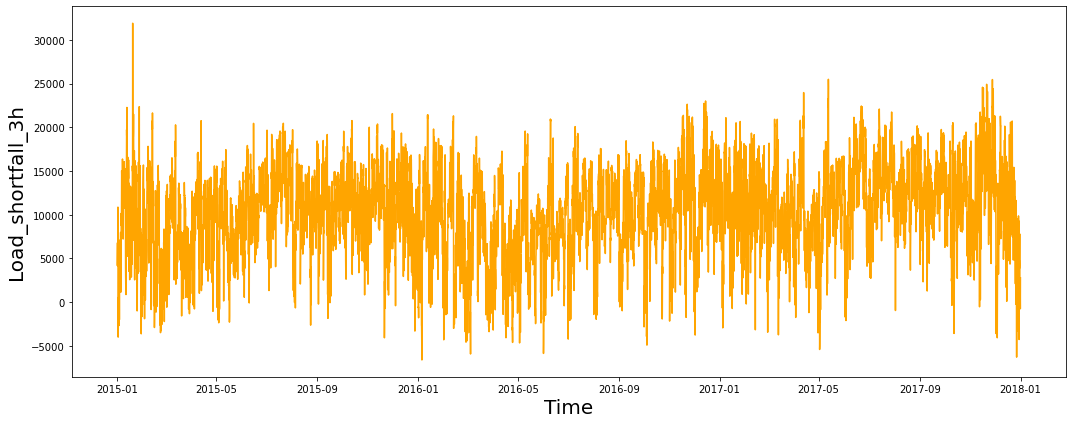

In [59]:
# Create plot
fig,ax = plt.subplots( 1, 1, figsize = ( 15, 6))
sns.lineplot( x = "time", y = "load_shortfall_3h",
            color = 'orange', data = df_copy, ax = ax)

# Set labels
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Load_shortfall_3h', fontsize=20)

# Show Plot
plt.show()

***


+ **Results** : The load shortfall shows a steady increase a few months into the year of 2016 up to the beginning of 2017.


***

#### 3.6.4 The `load_shortfall_3h` vs the `month`

The `sns.lineplot()` below represents the load shortfall during the months of the year. Each month was coded to a value (See table below).


| Code    | Month          | 
|---------|-----------------|
| 1       | January         | 
| 2       | February        | 
| 3       | March           | 
| 4       | April           | 
| 5       | May             |             
| 6       | June            |
| 7       | July            |
| 8       | August          |
| 9       | September       |
| 10      | October         |
| 11      | November        |
| 12      | December        |

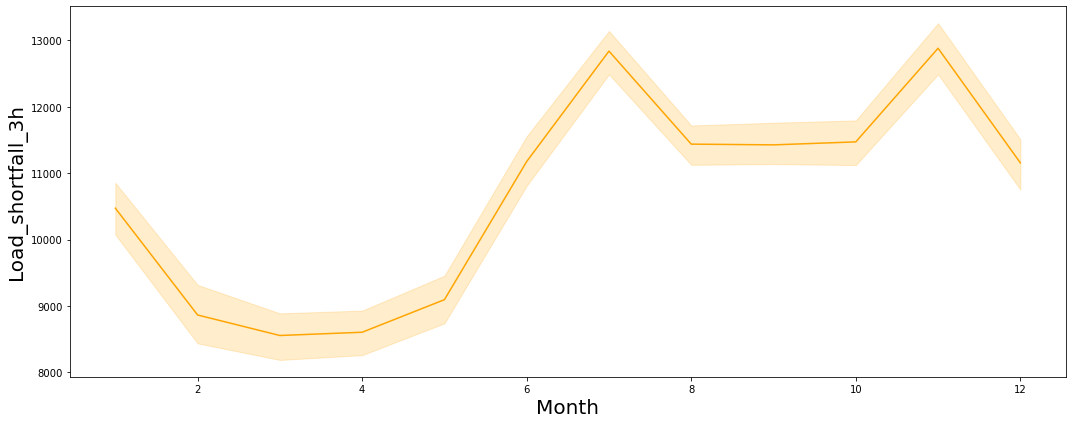

In [24]:
# Create plot
fig,ax = plt.subplots( 1, 1, figsize = ( 15, 6))
sns.lineplot( x = "Month", y = "load_shortfall_3h",
            color = 'orange', data = df_copy,
            ax = ax)

# Set labels
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Load_shortfall_3h', fontsize=20)

# Show Plot
plt.show()

***


+ **Results** : The line graph seen above, exhibits the load shortfall to have two increase peaks i.e. July and November. 


***

#### 3.6.5 The `load_shortfall_3h` vs the `Start_weekday`

The `sns.lineplot` below displays the load shortfall's change during the week days. Each day of the week was coded to a value (See table below).

| Code    |Day of the Week | 
|---------|----------------|
| 0       | Monday         | 
| 1       | Tuesday        | 
| 2       | Wednesday      | 
| 3       | Thursday       | 
| 4       | Friday         |             
| 5       | Saturday       |
| 6       | Sunday         |

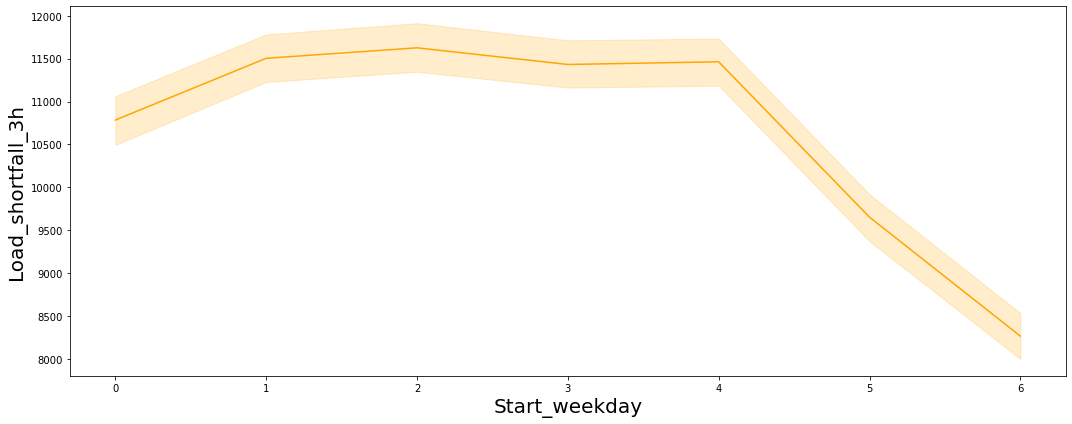

In [25]:
# Create plot
fig,ax = plt.subplots( 1, 1, figsize = ( 15, 6))
sns.lineplot( x = "Start_weekday", y = "load_shortfall_3h",
            color = 'orange', data = df_copy,
            ax = ax)

# Set labels
ax.set_xlabel('Start_weekday', fontsize=20)
ax.set_ylabel('Load_shortfall_3h', fontsize=20)

# Show Plot
plt.show()

***


+ **Results** : The line graph seen above, highlights the load shortfall to be at it's highest on a Tuesday and Wednesday. The plot also shows a drop in the load shortfall from Friday to Sunday.


***

### 3.7 Correlation 

To analyse the relationships between the features, we applied the correlation measure to it.

In [18]:
# Output the correlation matrix
df_copy.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,-0.218781,-0.140449,-0.116928,-0.093926,-0.075692,-0.075340,-0.092377,-0.040157,-0.082525,-0.068980,-0.104326,-0.028130,0.047202,0.034761,-0.022475,0.072472,0.267772,0.039424,0.385578,0.087002,0.135294,0.192485,0.042897,0.023917,0.185468,0.047417,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.37785

To have a more visual representation of the relationships between the featuresa correlation heatmap (`sns.heatmap()`) can be seen below.

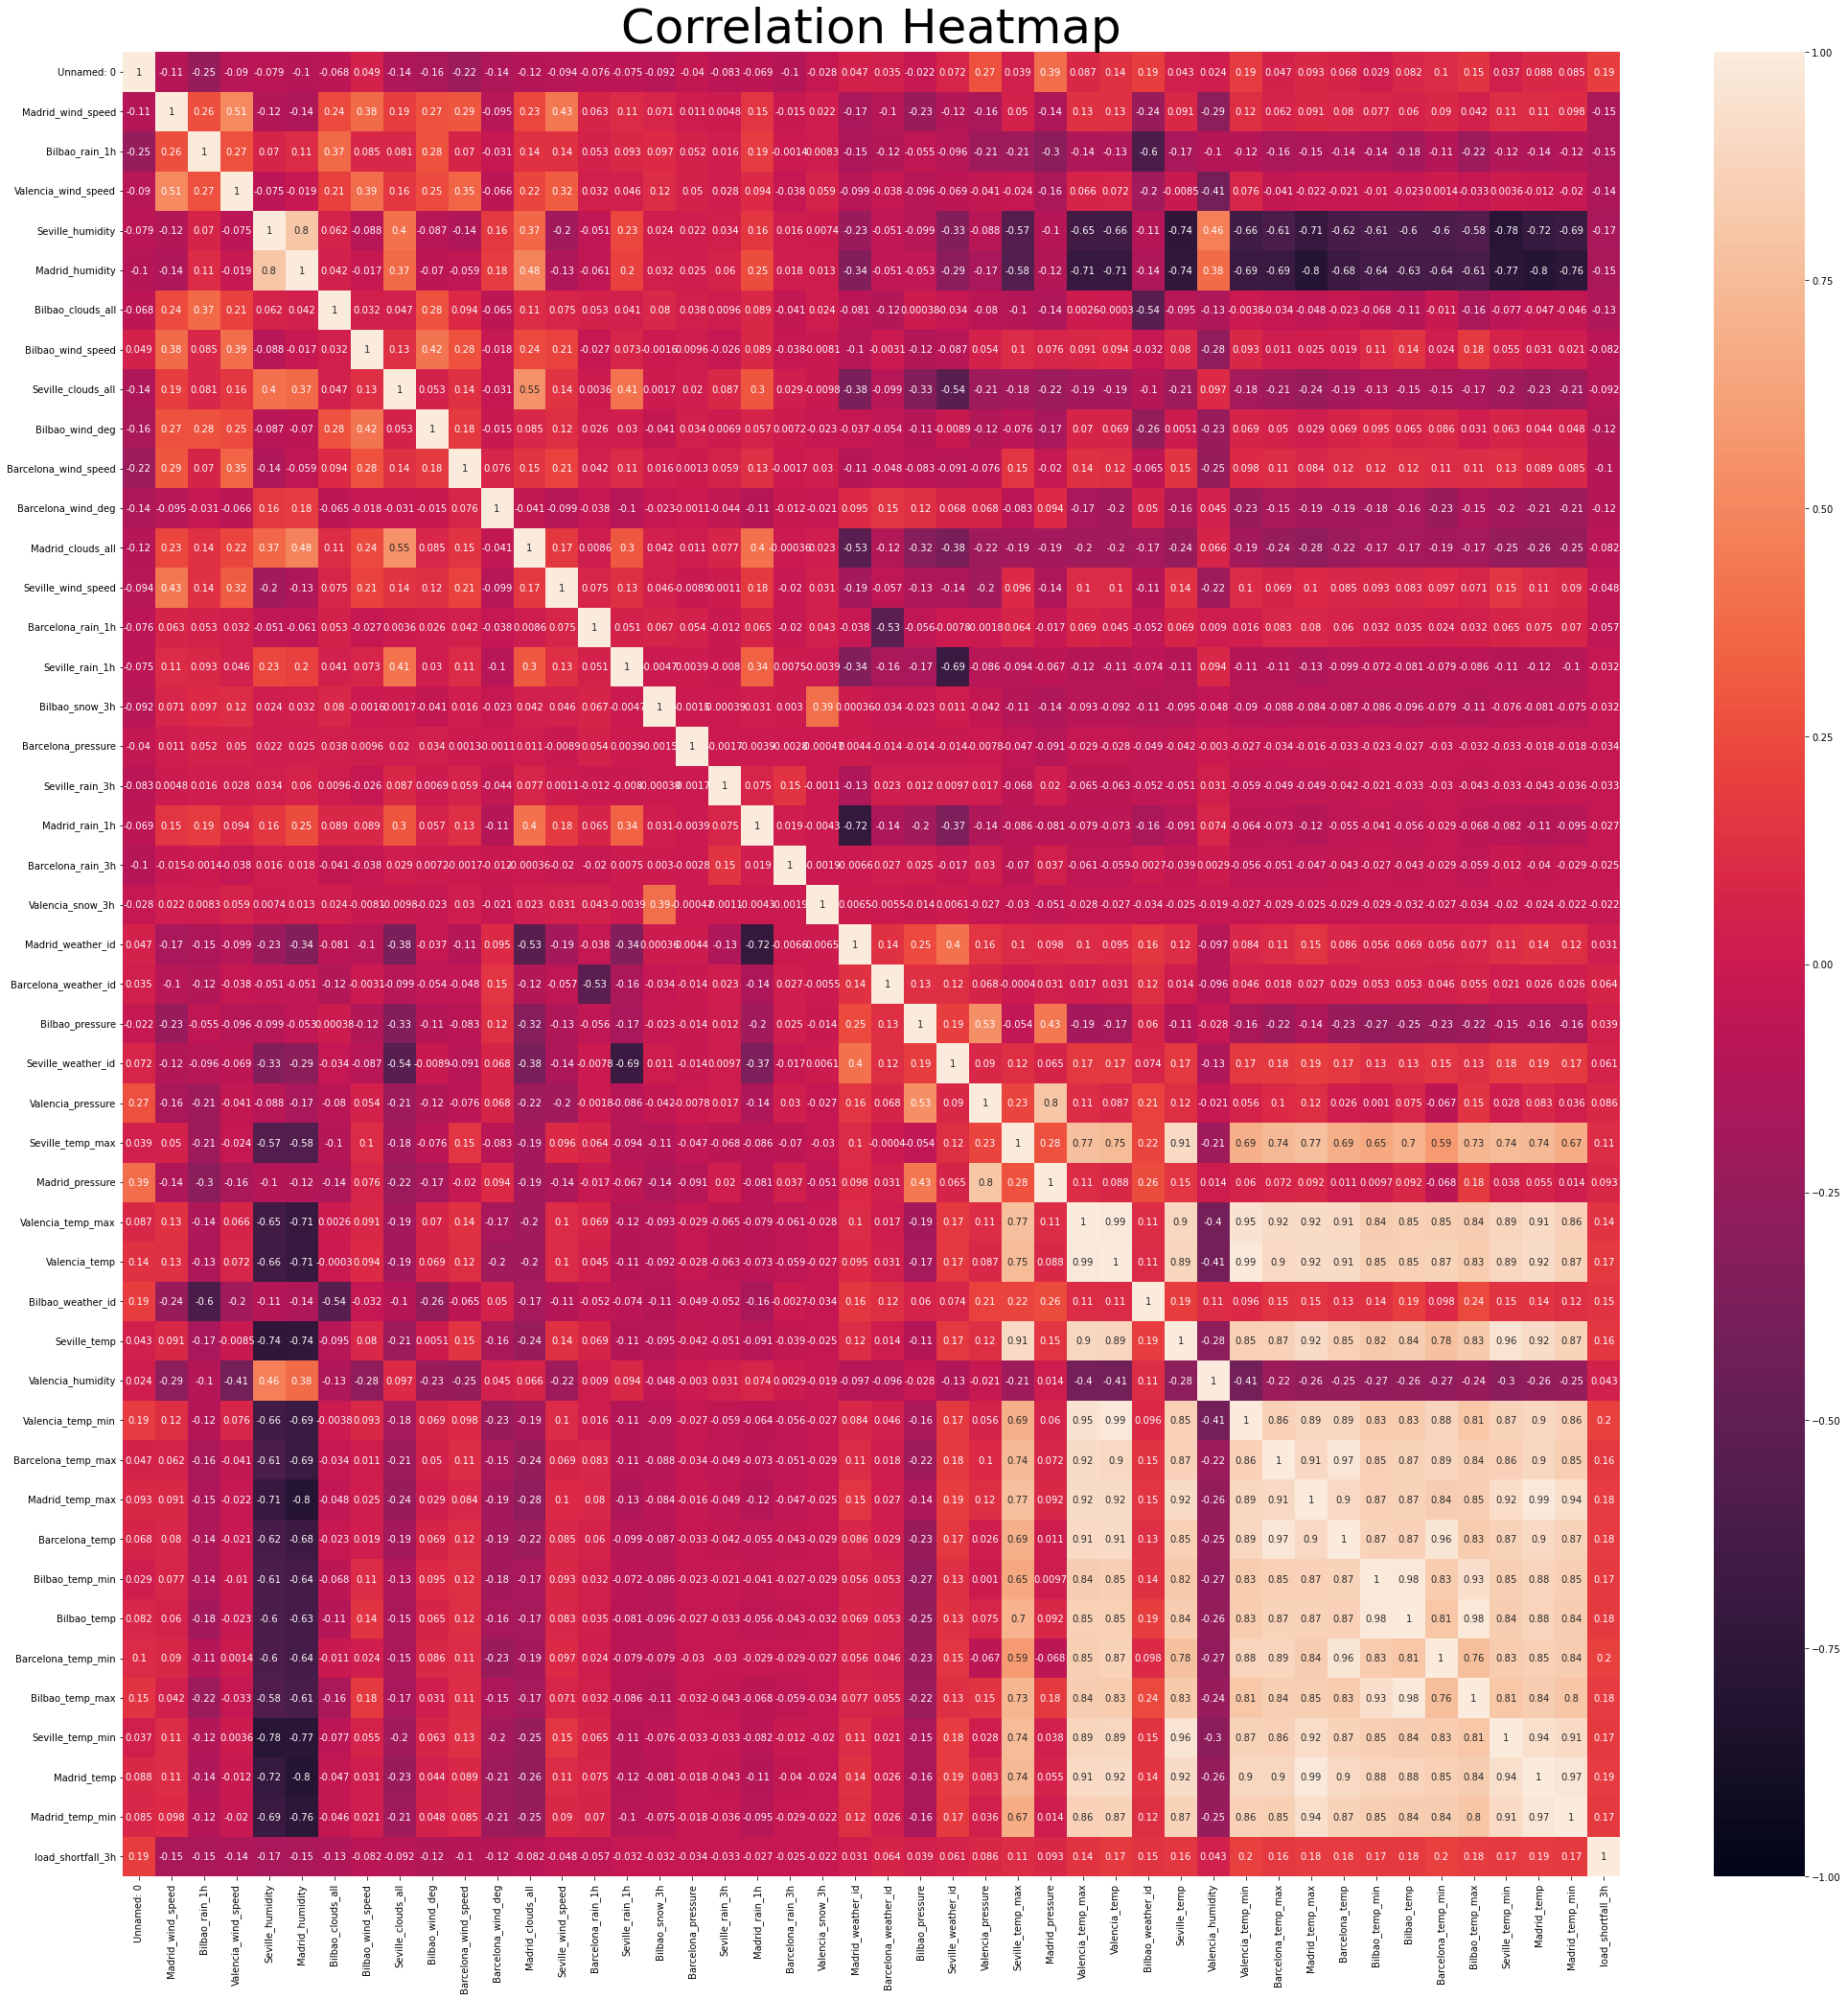

In [23]:
# Create heatmap
plt.figure(figsize=(35,35))
heatmap = sns.heatmap(df_copy.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':50}, pad=10);

***


+ **Results** : The matrix above highlights many positive relatioships among the features. However, there are a few weak correlations/relationships between the x features and the y target variable.

  For example, lets take a closer look at the city of Madrid and its various features: 
  1. madrid_temp to madrid_wind_speed = 0.109572 there is a weak positive correlation between madrid_temp and wind_speed
  2. madrid_temp to humidity = -0.759633 there is a moderate negative correlation between madrid_temp and humidity
  3. madrid_temp to clouds_all = -0.245475 there is a weak negative correlation between madrid_temp and clouds
  4. madrid_temp to rain1h = -0.094601 there is a weak negative correlation between madrid_temp and rain1h madrid_temp to weatherid = 0.123498
  5. madrid_temp to pressure = 0.014089 there is a weak positive correlation between madrid_temp and pressure

***

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



Data Engineering is the process before Modelling. It hereby fixes or removes duplicated, incorrect, incomplete or incorrectly captured data within a dataset.

### 4.1 Creating New Features

#### 4.1.1 Created the `Day`, `Month`, `Year`, `Start_hour`, `Start_minute`, `Start_second` and `Start_weekday` features.

We decided to create new features from the `time` variable and add them to the `df_copy` dataframe. Some of these features were fully inspected in the EDA.

In [6]:
# Creates new features of the time column
df_copy['Day'] = df_copy['time'].dt.day # Day
df_copy['Month'] = df_copy['time'].dt.month # Month
df_copy['Year'] = df_copy['time'].dt.year # Year
df_copy['Start_hour'] = df_copy['time'].dt.hour # Hour
df_copy['Start_minute'] = df_copy['time'].dt.minute # Minute
df_copy['Start_second'] = df_copy['time'].dt.second # Second
df_copy['Start_weekday'] = df_copy['time'].dt.weekday # Monday is 0 and Sunday is 6

***


+ **Results** : In the EDA, the time variable was converted to a datetime64 dtype. Several features such as `Day`, `Month`, `Year` etc were created and added to the `df_copy`  dataframe. 
These features allow for easy accesibility to information used in graphical plots and subsequent modelling.

***

#### 4.1.2 Created the `Season` feature.

We decided to create a new feature called `Season` from `df_copy['time'].dt.month`. We grouped the months and categorised them according to the seasons in Spain.

| Code    | Months          | 
|---------|-----------------|
| 1       | January         | 
| 2       | February        | 
| 3       | March           | 
| 4       | April           | 
| 5       | May             |             
| 6       | June            |
| 7       | July            |
| 8       | August          |
| 9       | September       |
| 10      | October         |
| 11      | November        |
| 12      | December        |

In [8]:
# Categorise the months according to the seasons
Spring = (3, 4, 5) # March, April and May
Summer = (6, 7, 8) # June, July and August
Autumn = (9, 10, 11) # September , October and November
Winter = (12, 1, 2) # December, January and February

# empty list 
Season= [] 

for code in list(df_copy['time'].dt.month): # run through the month column
    if code in Spring:
        Season.append(1) # Spring months
    elif code in Summer:
        Season.append(2) # Summer months
    elif code in Autumn:
        Season.append(3) # Autumn months
    else:
        Season.append(4) # Winter months

In [9]:
# Add to dataframe
df_copy['Season']=Season

***


+ **Results** : We added the `Season` feature based off the months of the year to the `df_copy` dataframe .

| Code  | Season |
|-------|--------|
| 1     | Spring |
| 2     | Summer | 
| 3     | Autumn |
| 4     | Winter |


***

### 4.2 Dealing with Missing Values 

The feature, `Valencia_pressure` consists of missing values and therefore, the rows require numerical values in order for a model to be trained on.

In [10]:
# Fill in the missing values using the median
df_copy['Valencia_pressure'] = df_copy.Valencia_pressure.fillna(df_copy.Valencia_pressure.median())

***


+ **Results** : The median was used to fill in the missing values of the column , `Valencia pressure`. Median has shown to be more robust in regards to extreme outliers.


***

### 4.3 Dropping Columns

`.drop` function is used to remove unnecessary columns.

In [11]:
# Drop unwanted columns
df_copy = df_copy.drop(['time','Unnamed: 0'], axis=1)

+ **Results** : The dataframe has a index therefore the `Unnamed:01` column does not add value to it and subsequent possible prediction. As we've already added new features from the `time` column, the `time` column was not needed for subsequent analyses.

### 4.3 Engineer existing features


#### 4.3.1 Dummy Variable Encoding 

For Regression models, data should all be present in numerical format therefore the features `Valencia_wind_deg` and `Seville_pressure`  were converted using `.get_dummies()` .

In [12]:
# engineer existing features
df_copy = pd.get_dummies(df_copy, drop_first=True, dtype=float)

In [13]:
# Displaying the top 5 rows of the dataframe
df_copy.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Season,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,Seville_pressure_sp11,Seville_pressure_sp12,Seville_pressure_sp13,Seville_pressure_sp14,Seville_pressure_sp15,Seville_pressure_sp16,Seville_pressure_sp17,Seville_pressure_sp18,Seville_pressure_sp19,Seville_pressure_sp2,Seville_pressure_sp20,Seville_pressure_sp21,Seville_pressure_sp22,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,1,1,2015,3,0,0,3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,1,1,2015,6,0,0,3,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,1,1,2015,9,0,0,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,1,1,2015,12,0,0,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1015.000000,285.513719,1035.333333,283.015115,283.015115,800

***


+ **Results** : The `Valencia_wind_deg` and `Seville_pressure` columns converted to the float dtype.


***

#### 4.3.2 Convert new features `dtype`.

To ensure that the regression models are built correctly, features were converted to the same dtype.

In [14]:
# Convert new columns dtype to float64
df_copy[['Day','Month','Year','Start_hour','Start_minute','Start_second','Start_weekday','Season']] = df_copy[['Day','Month','Year','Start_hour','Start_minute','Start_second','Start_weekday','Season']].astype('float')

In [15]:
# Check the dtype of the new columns
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Madrid_wind_speed           8763 non-null   float64
 1   Bilbao_rain_1h              8763 non-null   float64
 2   Valencia_wind_speed         8763 non-null   float64
 3   Seville_humidity            8763 non-null   float64
 4   Madrid_humidity             8763 non-null   float64
 5   Bilbao_clouds_all           8763 non-null   float64
 6   Bilbao_wind_speed           8763 non-null   float64
 7   Seville_clouds_all          8763 non-null   float64
 8   Bilbao_wind_deg             8763 non-null   float64
 9   Barcelona_wind_speed        8763 non-null   float64
 10  Barcelona_wind_deg          8763 non-null   float64
 11  Madrid_clouds_all           8763 non-null   float64
 12  Seville_wind_speed          8763 non-null   float64
 13  Barcelona_rain_1h           8763 

***


+ **Results** : All features are converted to the dtype, float64.


***

### 4.4 Correlation Matrix for the new features and target variable.

To analyse the relationships between the new features and the `load_shortfall_3h` target variable, we created a heatmap using `sns.heatmap`. 

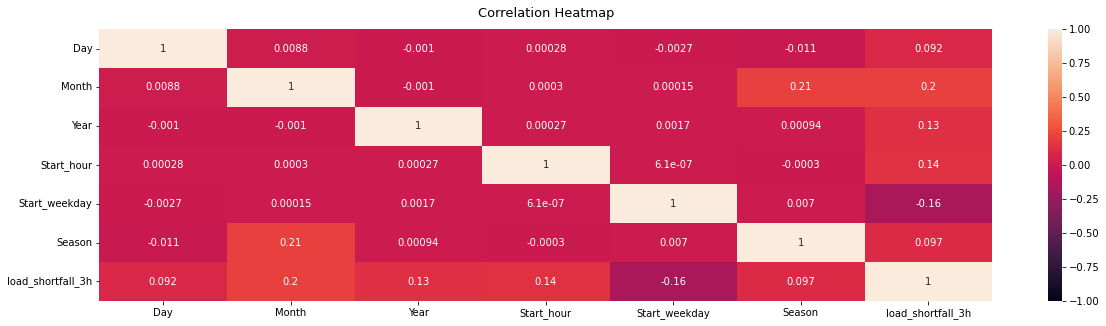

In [16]:
# Create heatmap
df_new_features = df_copy[['Day','Month','Year','Start_hour','Start_weekday','Season','load_shortfall_3h']] 

plt.figure(figsize=(20,5))
heatmap = sns.heatmap(df_new_features.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':13}, pad=12);

***


+ **Results** : The heatmap highlights strong correlations between the new features and the target variable.


***

### 4.5 Data Scaling

#### 4.5.1 Splitting into features and target variables.

Before model building can take place, the dataset needs to be split into **X** (features) and the **y** (target) variables.

In [17]:
# Split dataset
X = df_copy.drop(['load_shortfall_3h'], axis=1)
y = df_copy['load_shortfall_3h']

#### 4.5.2 Scaling of  `df_copy` dataset.

Apply normalization of dataset by implementing a `MinMaxScaler()` technique with the code below.

In [89]:
# create scaler object
scaler = MinMaxScaler()

#  create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

# # convert the scaled predictor values into a dataframe
# X_normalize = pd.DataFrame(X_scaled,columns=X.columns)

In [91]:
# # Select new columns
# X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# # Save variable names for later
# col_names =X_new.columns

# # View first few entries
# X_new.head()

,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_deg,Madrid_clouds_all,Seville_temp_max,Madrid_pressure,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour,Start_weekday,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,Seville_pressure_sp12,Seville_pressure_sp13,Seville_pressure_sp15,Seville_pressure_sp16,Seville_pressure_sp17,Seville_pressure_sp18,Seville_pressure_sp19,Seville_pressure_sp2,Seville_pressure_sp20,Seville_pressure_sp21,Seville_pressure_sp22,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp8,Season
0,0.720000,0.615658,0.00,0.0,0.621521,0.118519,0.0,0.045263,0.395770,0.000000,0.993296,0.051072,0.728625,0.211393,0.019286,0.279352,0.091896,0.019827,0.021028,0.0,0.0,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.763636,0.622776,0.00,0.0,0.615028,0.386111,0.0,0.059520,0.407855,0.045397,0.993296,0.067158,0.676580,0.200628,0.028350,0.266986,0.107351,0.029145,0.030910,0.0,0.0,0.0,0.285714,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.687273,0.619217,0.00,0.0,0.596475,0.905556,0.0,0.138971,0.419940,0.200319,0.993296,0.156803,0.617100,0.225004,0.156067,0.294986,0.193478,0.160443,0.170162,0.0,0.0,0.0,0.428571,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.621818,0.533808,0.00,0.0,0.555659,0.758333,0.0,0.275318,0.607251,0.370302,0.993296,0.310647,0.486989,0.269139,0.341654,0.345683,0.341284,0.351233,0.372508,0.0,0.0,0.0,0.571429,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.552727,0.540925,0.02,0.0,0.514842,0.722222,0.0,0.277791,0.975831,0.323817,0.993296,0.313437,0.535316,0.287721,0.317073,0.367027,0.343964,0.325963,0.345707,0.0,0.0,0.0,0.714286,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


During the Modelling chapter we will focus on splitting the dataset, implementing various regression models and measuring the performance of each of these models. 

### 5.1 Train-Test Split

Before building the models we need to split our dataset into a training and test dataset using `train_test_split`.

In [18]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

***


+ **Results** :  We split our training data into 80% (`X_train` and `y_train`) for training and 20% (`X_test`, `y_test`) for the validation test. We decided on this 80/20 split because we have a sufficient amount of training data to make analyses on. Random state is number that ensures we can reproduce the same results when we run the train test split a couple of times. In this case, we set the `random_state` as 1.


***

### 5.2 Machine Learning Models

For this project we will build and analyse four Regression models. Regression analysis is a form of Supervised Modelling which investigates the relationship between one or more independent variables and a dependent (target) variable. The analysis of Regression models involves the graphing of a line over a set of data points that most closely fits the overall shape of the data. Regression modelling exhibits the changes that occur in a target variable on the y-axis to the changes of the independent variables on the x-axis. Regression models can further be categorised into linear regression models (straight line) and non-linear regression models (curved line).

#### 5.2.1 Linear Regression

The first Regression model that we looked at, is the Linear Regression model. This is the simplest form of a regression model takes into account the relationship between a quantitative dependent variable and independent variables.

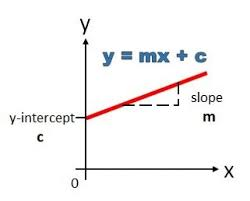

In [19]:
# Here we create the linear model object (lm)
lm_model = LinearRegression()

In [20]:
# Here we execute the fit function on our linear regression model with the training dataset from above.
lm_model.fit(X_train, y_train)

LinearRegression()

***


+ **Results** : We declare a linear regression model as `lm_model`. We fed it with our predictor variables' training set (X_train) and the predicted y_train variable in this instance to fit our model.


***

#### 5.2.2 XGBoost Regression

The XGBoost Regression model is an implementation of gradient boosted decision tree algorithms in Regression predictive modelling. We decided on the XGBoost as one of our Regression models because it aids in model performance and execution speed in large datasets. 

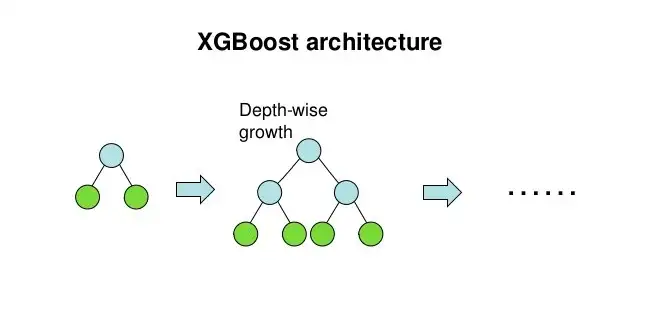

In [21]:
# Here we create the XGBoost Regressor model with some parameters
xgbmodel = xg.XGBRegressor(n_estimators = 200, learning_rate=0.05,random_state = 150)


In [22]:
# Here we train our XGBoost model with the train dataset
xgbmodel.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=150,
             reg_alpha=0, reg_lambda=1, ...)

***


+ **Results** : We declare an xgboost variable named `xgbmodel` and pass it few parameters: n_estimators, learning_rate, random_state. We then train the model using the X_train and y_train variables that we declared in our train test split.


***

#### 5.2.3 Random Forest Regression

To perhaps increase our overall prediction result, we decided to implement a Random Forest Regression model. This supervised machine learning model is defined by its ensemble learning method, whereby it creates multiple decision trees. After combining several decision trees and attaining their predictions, an average prediction is then calculated to give rise to a more accurate result.

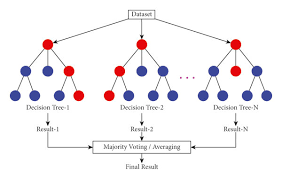

In [23]:
# Here we create the Random Forest Regression model with some parameters
rf_model = RandomForestRegressor(n_estimators = 200, random_state = 150)

In [24]:
# Here we train our Random Forest Regression model with the train dataset
rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=150)

***


+ **Results** : We declare a random forest model named `rf_model` that we pass some parameters named n_estimators and random_state. We then train our model by calling the fit function on our train dataset that we declared in our train test section.


***

#### 5.2.4 Ridge Regression

Our final model that we built was the Ridge Regression model that performs L2 regularizaation (no feature selection and shrinks the value but not to zero). The Ridge Regression model is implemented in datasets with which multicollinearity occurs. The term 'multicollinearity' refers to the unbiasness regarding least squares and large variance whereby the predicted values deviates from the actual values.

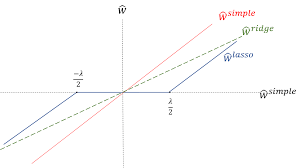

In [25]:
# Here we created the Ridge model
ridge_model = Ridge()

Ridge()

In [ ]:
# Here we trained the Ridge model with the training dataset
ridge_model.fit(X_train, y_train)

***


+ **Results** : We declare a ridge model named `ridge_model`. We then train our model by calling the fit function on our train dataset that we declared in our train test section.


***

<a id="five"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 6.1 Evaluation of the Machine Learning Models

After creating the models (Linear, XGBoost, Random Forest and Ridge), we calculated the performance of each of them using the Root Mean Squared Error (RMSE) metric. The RMSE score of each of the models can be seen the graph plotted below.

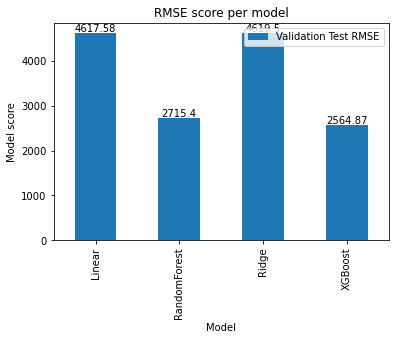

In [48]:
# Comparing the models' scores
predictedY = {            
                'Validation Test RMSE':
                {
                    "Linear": math.sqrt(metrics.mean_squared_error(y_test, lm_model.predict(X_test))),
                    "XGBoost": math.sqrt(metrics.mean_squared_error(y_test, xgbmodel.predict(X_test))),
                    "RandomForest": math.sqrt(metrics.mean_squared_error(y_test, rf_model.predict(X_test))),
                    "Ridge": math.sqrt(metrics.mean_squared_error(y_test, ridge_model.predict(X_test)))
                    
                }
            }

#print(metrics.r2_score(y_test, lm.predict(X_test)))

# create dataframe from dictionary
results_df = pd.DataFrame(data=predictedY)
 
#rmse_bar_plot = results_df.plot.bar(x='', y='val', rot=0)
rmse_bar_plot = results_df.plot(kind="bar")

plt.title("RMSE score per model")
plt.xlabel("Model")
plt.ylabel("Model score")
plt.bar_label(rmse_bar_plot.containers[0])

plt.show()

***


+ **Results** : We run the predict function on all the 4 models we wanted to test: Linear regression, RandomForest regression, Ridge regression and the XGBoost regression. We then compared the Root Mean Square Error for each model to see which one performs better and XGBoost gave us the lowest score at 2562.87 meaning it has a lower rate of error compared to the actual values. We decided to choose the XGBoost as our model to use for our test dataset.


***

### 6.2 Chosen Model Tested on the Test Dataset

As seen above, the XGBoost gave us the best RMSE score and therefore we will apply it to the test dataset. Before doing so, the same preprocessing and feature engineering practices that was administered on the train dataframe (`df_copy`) was applied to the test dataframe (`df_test_copy`).

The test dataset, `df_test.csv` was loaded into a Pandas Dats Frame using the Pandas function, `.read_csv()` and referred to as `df_test`.

In [2]:
# Loading the dataset
df_test = pd.read_csv('df_test.csv')

To prevent any unwanted changes occurring to the original test dataset, a copy of the test dataframe was made using the `df.copy()` method and referred to as `df_test_copy`.

In [58]:
# Copy the real test data
df_test_copy = df_test.copy()

`.shape` function returned the number of rows by the number of columns in the test dataframe.

In [59]:
# Displayes the number of rows and columns
df_test_copy.shape

(2920, 48)

***


+ **Results** : The `df_test_copy` dataframe consists of 2920 rows (observations) and 48 columns (features).


***

The `.to_datetime()` method converts the string object dtype of the *time* column.

In [60]:
# Creates new features of the time column
df_test_copy['time']=pd.to_datetime(df_test_copy['time'])

***


+ **Results** : The time variable was converted to a datetime64 dtype in order for new features to be created from it.


***

We created new features from the time variable and added them to the `df_test_copy` dataframe.

In [61]:
# Creates new features of the time column
df_test_copy['Day'] = df_test_copy['time'].dt.day # Day
df_test_copy['Month'] = df_test_copy['time'].dt.month # Month
df_test_copy['Year'] = df_test_copy['time'].dt.year # Year
df_test_copy['Start_hour'] = df_test_copy['time'].dt.hour # Hour
df_test_copy['Start_minute'] = df_test_copy['time'].dt.minute # Minute
df_test_copy['Start_second'] = df_test_copy['time'].dt.second # Second
df_test_copy['Start_weekday'] = df_test_copy['time'].dt.weekday # Monday is 0 and Sunday is 6

***


+ **Results** : The `df_test_copy` dataframe now includes features such as `Day`, `Month`, `Year` etc.

***

`.shape` method outputs the rows and the new added number of columns to the `df_test_copy` dataframe .

In [62]:
# Displays the number of rows and columns
df_test_copy.shape

(2920, 55)

***


+ **Results** : The `df_test_copy` dataframe consists of 2920 rows (observations) and 55 columns (features).


***

We decided to create a new feature called `Season` from `df_test_copy['time'].dt.month`. We grouped the months and categorised them according to the seasons in Spain.


| Code    | Months          | 
|---------|-----------------|
| 1       | January         | 
| 2       | February        | 
| 3       | March           | 
| 4       | April           | 
| 5       | May             |             
| 6       | June            |
| 7       | July            |
| 8       | August          |
| 9       | September       |
| 10      | October         |
| 11      | November        |
| 12      | December        |

In [63]:
# Categorise the months according to the seasons
Spring = (3, 4, 5) # March, April and May
Summer = (6, 7, 8) # June, July and August
Autumn = (9, 10, 11) # September , October and November
Winter = (12, 1, 2) # December, January and February

# empty list 
Season= [] 

for code in list(df_test_copy['time'].dt.month): # run through the month column
    if code in Spring:
        Season.append(1) # Spring months
    elif code in Summer:
        Season.append(2) # Summer months
    elif code in Autumn:
        Season.append(3) # Autumn months
    else:
        Season.append(4) # Winter months


In [ ]:
# Add to dataframe
df_test_copy['Season']=Season

***


+ **Results** : The `df_test_copy` dataframe now includes the feature, `Season`.

| Code  | Season |
|-------|--------|
| 1     | Spring |
| 2     | Summer | 
| 3     | Autumn |
| 4     | Winter |


***

The feature, Valencia_pressure consists of missing values and therefore, the rows require numerical values in order for the chosen model to be trained on.

In [ ]:
# Changes to test
df_test_copy['Valencia_pressure'] = df_test_copy.Valencia_pressure.fillna(df_test_copy.Valencia_pressure.median())

***


+ **Results** : The median was used to fill in the missing values of the column , Valencia pressure. Median has shown to be more robust in regards to extreme outliers.


***

 For Dummy Variable Encoding , the `.get_dummies()` function was applied to the `df_test_copy` dataframe.

In [66]:
# Conversion of columns
df_test_copy = pd.get_dummies(df_test_copy, drop_first=True,  dtype=float)

***


+ **Results** : The above categorical columns were converted to numerical format.


***

`.drop` function is used to remove unnecessary columns from the `df_test_copy` dataframe.

In [68]:
# Drop unwanted columns
df_test_copy = df_test_copy.drop(['time','Unnamed: 0'], axis=1)

***


+ **Results** : The `Unnamed:0` and  `time` column was not needed for subsequent modelling on the test dataframe.


***

The new feature columns were converted to the `float` numerical dtype.

In [70]:
# Conversion of dtype
df_test_copy[['Day','Month','Year','Start_hour','Start_minute','Start_second','Start_weekday','Bilbao_snow_3h','Valencia_snow_3h','Season']] = df_test_copy[['Day','Month','Year','Start_hour','Start_minute','Start_second','Start_weekday','Bilbao_snow_3h','Valencia_snow_3h','Season']].astype('float')

We normalized the `df_test_copy` dataframe using MinMaxScaler() technique.

In [72]:
#create scaler object
scaler = MinMaxScaler()

# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

# convert the scaled predictor values into a dataframe
X_normalize = pd.DataFrame(X_scaled,columns=X.columns)

X_normalize.shape

(8763, 85)

In [73]:
xgbmodel.fit(X_normalize,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=150,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
#create scaler object
scaler = MinMaxScaler()

# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(df_test_copy)

# convert the scaled predictor values into a dataframe
X_normalize_test_dataset = pd.DataFrame(X_scaled,columns=df_test_copy.columns)

In [75]:
#test model using the real test dataset i.e. predict the actual load_shedding values that 
#will be used to create our submission file.
#Random Forest model has been selected in this instance

real_predict_dataset = xgbmodel.predict(X_normalize_test_dataset)

In [76]:
#extract the predicted variables into a df
df_predict_load_vals = pd.DataFrame(real_predict_dataset, columns=['load_shortfall_3h'])

In [77]:
df_predict_load_vals.head(15)

,load_shortfall_3h
0,8224.049805
1,5055.873535
2,3582.926758
3,5327.424805
4,7046.999023
5,9624.285156
6,7136.014160
7,9688.548828
8,9432.370117
9,4651.293457


Output the file for submission using `.to_csv`.

In [113]:
output = pd.DataFrame({'time':df_test['time']})
submission = output.join(df_predict_load_vals)
submission.to_csv('submission.csv', index=False)

In [114]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               2920 non-null   object 
 1   load_shortfall_3h  2920 non-null   float32
dtypes: float32(1), object(1)
memory usage: 34.3+ KB


***


+ **Results** : The section above takes the predicted values from our model and converts it into a submission.csv file that contains the time and load_shortfall_3h columns.


***

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

***


+ **Conclusion** : 


***